## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2.3 million compounds. It is compiled from more than 85,000 documents, 1.5 million assays and the data spans 15,000 targets and 2,000 cells and 43,000 indications.
[Data as of July 22, 2022; ChEMBL version 31].

## **Installing libraries**

Install the ChEMBL web service package to retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client



In [ ]:
! pip install pyopenssl
! pip install ndg-httpsclient
! pip install pyasn1

## **Importing libraries**

In [3]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for COX2*

In [16]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('Cyclooxygenase-2')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P35354', 'xref_name': None, 'xre...",Homo sapiens,Cyclooxygenase-2,18.0,False,CHEMBL230,"[{'accession': 'P35354', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,"[{'xref_id': 'O62698', 'xref_name': None, 'xre...",Bos taurus,Cyclooxygenase-2,18.0,False,CHEMBL3331,"[{'accession': 'O62698', 'component_descriptio...",SINGLE PROTEIN,9913.0
2,"[{'xref_id': 'Q05769', 'xref_name': None, 'xre...",Mus musculus,Cyclooxygenase-2,18.0,False,CHEMBL4321,"[{'accession': 'Q05769', 'component_descriptio...",SINGLE PROTEIN,10090.0
3,"[{'xref_id': 'Q8SPQ9', 'xref_name': None, 'xre...",Canis lupus familiaris,Cyclooxygenase-2,18.0,False,CHEMBL4033,"[{'accession': 'Q8SPQ9', 'component_descriptio...",SINGLE PROTEIN,9615.0
4,"[{'xref_id': 'P35355', 'xref_name': None, 'xre...",Rattus norvegicus,Cyclooxygenase-2,18.0,False,CHEMBL2977,"[{'accession': 'P35355', 'component_descriptio...",SINGLE PROTEIN,10116.0
...,...,...,...,...,...,...,...,...,...
2621,[],Mus musculus,Glutamate NMDA receptor,0.0,False,CHEMBL3832634,"[{'accession': 'P35436', 'component_descriptio...",PROTEIN COMPLEX GROUP,10090.0
2622,[],Mus musculus,L-type calcium channel,0.0,False,CHEMBL3988632,"[{'accession': 'Q01815', 'component_descriptio...",PROTEIN FAMILY,10090.0
2623,[],Rattus norvegicus,Voltage-gated sodium channel,0.0,False,CHEMBL3988641,"[{'accession': 'O88457', 'component_descriptio...",PROTEIN FAMILY,10116.0
2624,[],Homo sapiens,UDP-glucuronosyltransferases (UGTs),0.0,False,CHEMBL4523985,"[{'accession': 'P22310', 'component_descriptio...",PROTEIN FAMILY,9606.0


### **Select and retrieve bioactivity data for *Human COX2* (first entry)**

In [17]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL230'

In [18]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [19]:
df = pd.DataFrame.from_dict(res)

In [20]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,34205,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.06
1,None,34209,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,3.23
2,None,35476,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.08
3,None,36218,[],CHEMBL769655,Tested in vitro for inhibition against Prostag...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,nM,UO_0000065,None,0.12
4,None,36708,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,None,23305825,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.006999999999999999
7379,None,23305826,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.04
7380,None,23305827,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.015
7381,None,23305828,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.006


In [32]:
df.to_csv('COX2_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
missing value for the **standard_value** and **canonical_smiles** column, then remove the compound.

In [33]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_6450/3852201246.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,34205,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.06
1,None,34209,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,3.23
2,None,35476,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.08
3,None,36218,[],CHEMBL769655,Tested in vitro for inhibition against Prostag...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,nM,UO_0000065,None,0.12
4,None,36708,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,None,23305825,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.006999999999999999
7379,None,23305826,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.04
7380,None,23305827,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.015
7381,None,23305828,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.006


In [34]:
len(df2.canonical_smiles.unique())

4629

In [35]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,34205,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.06
1,None,34209,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,3.23
2,None,35476,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.08
3,None,36218,[],CHEMBL769655,Tested in vitro for inhibition against Prostag...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,nM,UO_0000065,None,0.12
4,None,36708,[],CHEMBL762912,In vitro inhibitory activity against human pro...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377,None,23305824,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.099
7378,None,23305825,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.006999999999999999
7379,None,23305826,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.04
7380,None,23305827,[],CHEMBL4843079,Inhibition of human recombinant COX-2 using ar...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclooxygenase-2,9606,None,None,IC50,uM,UO_0000065,None,0.015


## **Data pre-processing**

In [36]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.0
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.0
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.0
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.0
...,...,...,...
7377,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,99.0
7378,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,7.0
7379,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,40.0
7380,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,15.0


In [37]:
df3.to_csv('COX2_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values < 1000 nM will be considered to be **active** ; > 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [38]:
df4 = pd.read_csv('COX2_02_bioactivity_data_preprocessed.csv')

In [39]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [40]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.00,active
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.00,intermediate
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.00,active
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12,active
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
...,...,...,...,...
4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,99.00,active
4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,7.00,active
4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,40.00,active
4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,15.00,active


In [41]:
df5.to_csv('COX2_03_bioactivity_data_curated.csv', index=False)

In [42]:
! zip COX2.zip *.csv

  adding: COX2_01_bioactivity_data_raw.csv (deflated 91%)
  adding: COX2_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: COX2_03_bioactivity_data_curated.csv (deflated 83%)
  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 83%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: descriptors_output.csv (deflated 96%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)


In [44]:
df = pd.read_csv('COX2_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.00,active
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.00,intermediate
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.00,active
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12,active
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
...,...,...,...,...
4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,99.00,active
4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,7.00,active
4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,40.00,active
4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,15.00,active


In [45]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [46]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [47]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL297008,60.00,active,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1
1,CHEMBL289813,3230.00,intermediate,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1
2,CHEMBL43736,80.00,active,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...
3,CHEMBL140167,0.12,active,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1
4,CHEMBL44194,100000.00,inactive,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1
...,...,...,...,...
4624,CHEMBL4876413,99.00,active,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1
4625,CHEMBL4849659,7.00,active,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...
4626,CHEMBL4878422,40.00,active,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...
4627,CHEMBL4874336,15.00,active,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

---

In [48]:
! pip install rdkit

In [49]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [50]:
# reference: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [51]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.406,3.85622,0.0,3.0
1,357.406,3.80782,0.0,4.0
2,469.965,6.22772,0.0,4.0
3,335.397,6.38170,1.0,0.0
4,343.423,4.24930,0.0,3.0
...,...,...,...,...
4624,338.411,2.68632,0.0,6.0
4625,445.523,3.03122,0.0,8.0
4626,449.942,3.67602,0.0,7.0
4627,479.968,3.68462,0.0,8.0


In [52]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.406,3.85622,0.0,3.0
1,357.406,3.80782,0.0,4.0
2,469.965,6.22772,0.0,4.0
3,335.397,6.38170,1.0,0.0
4,343.423,4.24930,0.0,3.0
...,...,...,...,...
4624,338.411,2.68632,0.0,6.0
4625,445.523,3.03122,0.0,8.0
4626,449.942,3.67602,0.0,7.0
4627,479.968,3.68462,0.0,8.0


In [53]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.00,active
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.00,intermediate
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.00,active
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12,active
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
...,...,...,...,...
4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,99.00,active
4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,7.00,active
4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,40.00,active
4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,15.00,active


In [54]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,60.00,active
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,3230.00,intermediate
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,80.00,active
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,0.12,active
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,100000.00,inactive
...,...,...,...,...
4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,99.00,active
4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,7.00,active
4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,40.00,active
4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,15.00,active


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [55]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [56]:
df_combined.standard_value.describe()

count    4.629000e+03
mean     5.559681e+04
std      1.011090e+06
min      0.000000e+00
25%      1.600000e+02
50%      1.930000e+03
75%      1.500000e+04
max      6.000000e+07
Name: standard_value, dtype: float64

In [57]:
-np.log10( (10**-9)* 100000000 )

1.0

In [58]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [59]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

normalized standard_value 

In [60]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_6450/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,60.00
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,357.406,3.80782,0.0,4.0,3230.00
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,80.00
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,0.12
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,100000.00
...,...,...,...,...,...,...,...,...
4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,active,338.411,2.68632,0.0,6.0,99.00
4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,active,445.523,3.03122,0.0,8.0,7.00
4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,active,449.942,3.67602,0.0,7.0,40.00
4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,active,479.968,3.68462,0.0,8.0,15.00


In [61]:
df_norm.standard_value_norm.describe()

count    4.629000e+03
mean     5.559681e+04
std      1.011090e+06
min      0.000000e+00
25%      1.600000e+02
50%      1.930000e+03
75%      1.500000e+04
max      6.000000e+07
Name: standard_value_norm, dtype: float64

In [62]:
df_final = pIC50(df_norm)
df_final

/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_6450/3442786292.py:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
/var/folders/n3/d5yqrn894gxg28v6vnf7gw3c0000gn/T/ipykernel_6450/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,7.221849
1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,357.406,3.80782,0.0,4.0,5.490797
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,7.096910
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,9.920819
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,active,338.411,2.68632,0.0,6.0,7.004365
4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,active,445.523,3.03122,0.0,8.0,8.154902
4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,active,449.942,3.67602,0.0,7.0,7.397940
4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,active,479.968,3.68462,0.0,8.0,7.823909


In [63]:
df_final.pIC50.describe()

count    4629.000000
mean             inf
std              NaN
min         1.221849
25%         4.823909
50%         5.714443
75%         6.795880
max              inf
Name: pIC50, dtype: float64

In [64]:
df_final.to_csv('COX2_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**

In [65]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,7.221849
2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,7.096910
3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,9.920819
4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
6,CHEMBL288773,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1Cc1ccc(F)cc1,inactive,343.423,4.05442,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,active,338.411,2.68632,0.0,6.0,7.004365
4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,active,445.523,3.03122,0.0,8.0,8.154902
4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,active,449.942,3.67602,0.0,7.0,7.397940
4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,active,479.968,3.68462,0.0,8.0,7.823909


In [66]:
df_2class.to_csv('COX2_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**


In [67]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

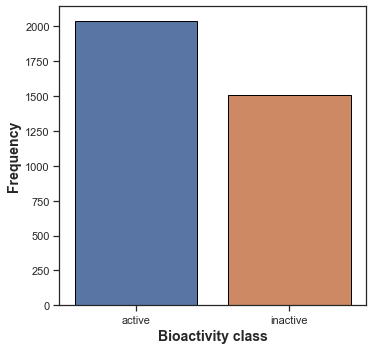

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

#### **pIC50 value**

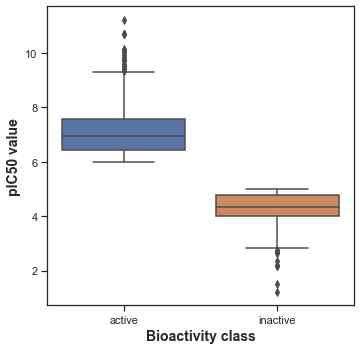

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [71]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [72]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,3079869.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

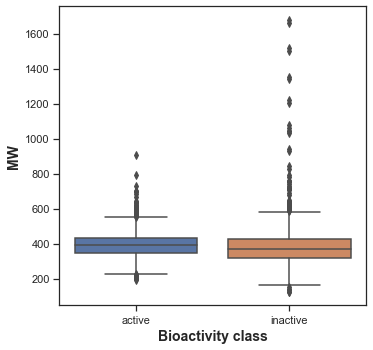

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [74]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1768737.0,3.483624e-14,0.05,Different distribution (reject H0)


#### **LogP**

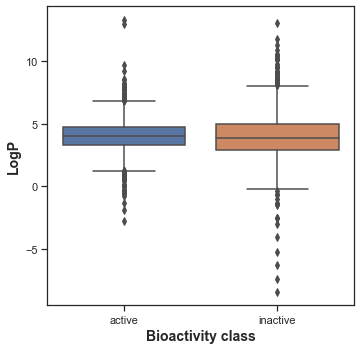

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [76]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1612442.0,0.016317,0.05,Different distribution (reject H0)


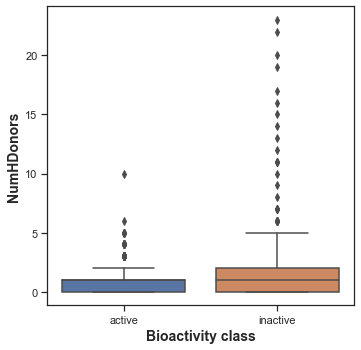

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [78]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1326461.5,5.439518e-14,0.05,Different distribution (reject H0)


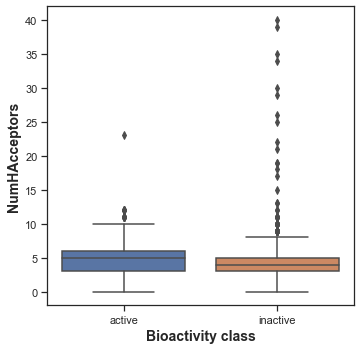

In [79]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [80]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1671765.0,0.000009,0.05,Different distribution (reject H0)


###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [81]:
! pip install wget

In [82]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [83]:
df3 = pd.read_csv('COX2_04_bioactivity_data_3class_pIC50.csv')

In [84]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,7.221849
1,1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,357.406,3.80782,0.0,4.0,5.490797
2,2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,7.096910
3,3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,9.920819
4,4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...,...
4624,4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,active,338.411,2.68632,0.0,6.0,7.004365
4625,4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,active,445.523,3.03122,0.0,8.0,8.154902
4626,4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,active,449.942,3.67602,0.0,7.0,7.397940
4627,4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,active,479.968,3.68462,0.0,8.0,7.823909


In [85]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [86]:
! cat molecule.smi | head -5

Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1	CHEMBL297008
Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1	CHEMBL289813
Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1	CHEMBL43736
Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1	CHEMBL140167
CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1	CHEMBL44194
cat: stdout: Broken pipe


In [87]:
! cat molecule.smi | wc -l

    4629


## **Calculate fingerprint descriptors**

### **Calculate PaDEL descriptors**

In [88]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [89]:
! bash padel.sh

Processing CHEMBL297008 in molecule.smi (1/4629). 
Processing CHEMBL289813 in molecule.smi (2/4629). 
Processing CHEMBL43736 in molecule.smi (3/4629). 
Processing CHEMBL140167 in molecule.smi (4/4629). 
Processing CHEMBL44194 in molecule.smi (5/4629). 
Processing CHEMBL44290 in molecule.smi (6/4629). 
Processing CHEMBL288773 in molecule.smi (7/4629). 
Processing CHEMBL44068 in molecule.smi (8/4629). 
Processing CHEMBL44367 in molecule.smi (9/4629). 
Processing CHEMBL297409 in molecule.smi (10/4629). 
Processing CHEMBL43737 in molecule.smi (11/4629). 
Processing CHEMBL43511 in molecule.smi (12/4629). 
Processing CHEMBL42801 in molecule.smi (13/4629). 
Processing CHEMBL1316 in molecule.smi (14/4629). 
Processing CHEMBL40245 in molecule.smi (15/4629). 
Processing CHEMBL43210 in molecule.smi (16/4629). 
Processing CHEMBL298231 in molecule.smi (17/4629). 
Processing CHEMBL44152 in molecule.smi (19/4629). Average speed: 1.05 s/mol.
Processing CHEMBL44101 in molecule.smi (18/4629). Average sp

## **Preparing the X and Y Data Matrices**

In [90]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL297008,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1,active,311.406,3.85622,0.0,3.0,7.221849
1,1,CHEMBL289813,Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,intermediate,357.406,3.80782,0.0,4.0,5.490797
2,2,CHEMBL43736,Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...,active,469.965,6.22772,0.0,4.0,7.096910
3,3,CHEMBL140167,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1,active,335.397,6.38170,1.0,0.0,9.920819
4,4,CHEMBL44194,CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1,inactive,343.423,4.24930,0.0,3.0,4.000000
...,...,...,...,...,...,...,...,...,...
4624,4624,CHEMBL4876413,Cc1nc2oc(-c3ccccc3)nn2c(=O)c1CCN1CCCCC1,active,338.411,2.68632,0.0,6.0,7.004365
4625,4625,CHEMBL4849659,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccccc5)nn4c3=O)...,active,445.523,3.03122,0.0,8.0,8.154902
4626,4626,CHEMBL4878422,Cc1nc2oc(-c3ccc(Cl)cc3)nn2c(=O)c1CCN1CCN(c2ccc...,active,449.942,3.67602,0.0,7.0,7.397940
4627,4627,CHEMBL4874336,COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn4c...,active,479.968,3.68462,0.0,8.0,7.823909


In [91]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL44068,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL297409,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL297008,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL44367,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1316,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,CHEMBL4849659,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4625,CHEMBL4862239,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4626,CHEMBL4870953,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4627,CHEMBL4874336,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4625,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4626,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4627,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df3_Y = df3['pIC50']
df3_Y

0       7.221849
1       5.490797
2       7.096910
3       9.920819
4       4.000000
          ...   
4624    7.004365
4625    8.154902
4626    7.397940
4627    7.823909
4628    8.059982
Name: pIC50, Length: 4629, dtype: float64

In [94]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.221849
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.490797
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.920819
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.004365
4625,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.154902
4626,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940
4627,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823909


In [95]:
dataset3.to_csv('COX2_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [96]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [97]:
df = pd.read_csv('COX2_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [98]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["pIC50"])

X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4625,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4626,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4627,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


The ***COX2*** data set contains 881 input features and 1 output variable (pIC50 values).

In [99]:
Y = df.pIC50

Y

0       7.221849
1       5.490797
2       7.096910
3       9.920819
4       4.000000
          ...   
4624    7.004365
4625    8.154902
4626    7.397940
4627    7.823909
4628    8.059982
Name: pIC50, Length: 4622, dtype: float64

In [100]:
X.shape

(4622, 881)

In [101]:
Y.shape

(4622,)

In [102]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [103]:
X.shape

(4622, 182)

## **Data split (80/20 ratio)**

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [105]:
X_train.shape, Y_train.shape

((3697, 182), (3697,))

In [106]:
X_test.shape, Y_test.shape

((925, 182), (925,))

## **Building a Regression Model using Random Forest**


In [107]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.1700807922602655

In [108]:
Y_pred = model.predict(X_test)

/Users/yupuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

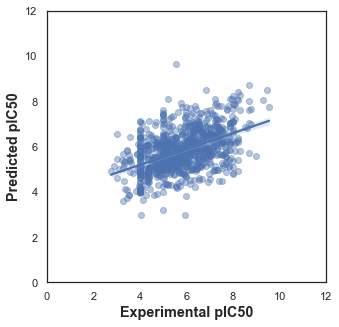

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [171]:
! pip install lazypredict

     |████████████████████████████████| 1.3 MB 543 kB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 40 kB/s eta 0:00:011


Compare model perfromance


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
import lazypredict


In [173]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(5823, 143)

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [ ]:
predictions_train

In [ ]:
predictions_test

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))